In [ ]:
import numpy as np
import pandas as pd



## 1. 모델 학습 GradientBoosting
- Smote 미적용, 소득&나이 수치형 변환 X

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, f1_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

newspaper_df = pd.read_csv('no_SMOTE_no_convert.csv')

X = newspaper_df.drop('is_churned', axis=1)
y = newspaper_df['is_churned']

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GradientBoosting Classifier 모델 생성
gb_clf = GradientBoostingClassifier(random_state=42)

# 파라미터
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정 및 학습
grid_search = GridSearchCV(gb_clf, param_grid=params, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_gb = grid_search.best_estimator_
y_proba = best_gb.predict_proba(X_test)[:, 1]

# threshold 탐색
thresholds = np.arange(0.3, 0.71, 0.01)
best_thresh, best_macro_f1 = 0.5, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_0 = f1_score(y_test, y_pred_t, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_t, pos_label=1)
    macro_f1 = (f1_0 + f1_1) / 2

    if macro_f1 > best_macro_f1:
        best_macro_f1, best_thresh = macro_f1, t

# 최적 threshold 적용
y_pred_best = (y_proba >= best_thresh).astype(int)

print('GradientBoosting Classifier, No Smote, No Convert')
print('best parameters', grid_search.best_params_)
print(f'Best threshold: {best_thresh:.2f}, Macro F1: {best_macro_f1:.4f}')
print('report', classification_report(y_test, y_pred_best))

GradientBoosting Classifier, No Smote, No Convert
best parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best threshold: 0.66, Macro F1: 0.7589
report               precision    recall  f1-score   support

           0       0.64      0.58      0.61       601
           1       0.90      0.92      0.91      2487

    accuracy                           0.85      3088
   macro avg       0.77      0.75      0.76      3088
weighted avg       0.85      0.85      0.85      3088

Before SMOTE: [2403 9947]


## 2. 모델 학습 GradientBoosting
- Smote 미적용, 소득&나이 수치형 변환 O

In [ ]:
newspaper_df = pd.read_csv('no_SMOTE_yes_convert.csv')

X = newspaper_df.drop('is_churned', axis=1)
y = newspaper_df['is_churned']

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GradientBoosting Classifier 모델 생성
gb_clf = GradientBoostingClassifier(random_state=42)

# 파라미터
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정 및 학습
grid_search = GridSearchCV(gb_clf, param_grid=params, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_gb = grid_search.best_estimator_
y_proba = best_gb.predict_proba(X_test)[:, 1]

# threshold 탐색
thresholds = np.arange(0.3, 0.71, 0.01)
best_thresh, best_macro_f1 = 0.5, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_0 = f1_score(y_test, y_pred_t, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_t, pos_label=1)
    macro_f1 = (f1_0 + f1_1) / 2

    if macro_f1 > best_macro_f1:
        best_macro_f1, best_thresh = macro_f1, t

# 최적 threshold 적용
y_pred_best = (y_proba >= best_thresh).astype(int)

print('GradientBoosting Classifier, No Smote, Yes Convert')
print('best parameters', grid_search.best_params_)
print(f'Best threshold: {best_thresh:.2f}, Macro F1: {best_macro_f1:.4f}')
print('report', classification_report(y_test, y_pred_best))

GradientBoosting Classifier, No Smote, Yes Convert
best parameters {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best threshold: 0.67, Macro F1: 0.7488
report               precision    recall  f1-score   support

           0       0.60      0.59      0.59       601
           1       0.90      0.91      0.90      2487

    accuracy                           0.84      3088
   macro avg       0.75      0.75      0.75      3088
weighted avg       0.84      0.84      0.84      3088

Before SMOTE: [2403 9947]


## 3. 모델 학습 GradientBoosting
- Smote 적용, 소득&나이 수치형 변환 X

In [ ]:
newspaper_df = pd.read_csv('yes_SMOTENC_no_convert.csv')

X = newspaper_df.drop('is_churned', axis=1)
y = newspaper_df['is_churned']

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GradientBoosting Classifier 모델 생성
gb_clf = GradientBoostingClassifier(random_state=42)

# 파라미터
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 설정 및 학습
grid_search = GridSearchCV(gb_clf, param_grid=params, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_gb = grid_search.best_estimator_
y_proba = best_gb.predict_proba(X_test)[:, 1]

# threshold 탐색
thresholds = np.arange(0.3, 0.71, 0.01)
best_thresh, best_macro_f1 = 0.5, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_0 = f1_score(y_test, y_pred_t, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_t, pos_label=1)
    macro_f1 = (f1_0 + f1_1) / 2

    if macro_f1 > best_macro_f1:
        best_macro_f1, best_thresh = macro_f1, t

# 최적 threshold 적용
y_pred_best = (y_proba >= best_thresh).astype(int)

print('GradientBoosting Classifier, Yes Smote, No Convert')
print('best parameters', grid_search.best_params_)
print(f'Best threshold: {best_thresh:.2f}, Macro F1: {best_macro_f1:.4f}')
print('report', classification_report(y_test, y_pred_best))

GradientBoosting Classifier, Yes Smote, No Convert
best parameters {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best threshold: 0.46, Macro F1: 0.8591
report               precision    recall  f1-score   support

           0       0.85      0.87      0.86      2487
           1       0.86      0.85      0.86      2487

    accuracy                           0.86      4974
   macro avg       0.86      0.86      0.86      4974
weighted avg       0.86      0.86      0.86      4974

Before SMOTE: [9947 9947]


## 4. 모델 학습 GradientBoosting
- Smote 적용, 소득&나이 수치형 변환 O

In [13]:
newspaper_df = pd.read_csv('yes_SMOTENC_yes_convert.csv')

X = newspaper_df.drop('is_churned', axis=1)
y = newspaper_df['is_churned']

# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# GradientBoosting Classifier 모델 생성
gb_clf = GradientBoostingClassifier(random_state=42)

# 파라미터
params = {
    'n_estimators': [250, 300, 350, 400],
    'learning_rate': [0.175, 0.2, 0.225, 0.25],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.9, 0.95, 1.0]
}

# GridSearchCV 설정 및 학습
grid_search = GridSearchCV(gb_clf, param_grid=params, cv=5, scoring='f1', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_gb = grid_search.best_estimator_
y_proba = best_gb.predict_proba(X_test)[:, 1]

# threshold 탐색
thresholds = np.arange(0.3, 0.71, 0.01)
best_thresh, best_macro_f1 = 0.5, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_0 = f1_score(y_test, y_pred_t, pos_label=0)
    f1_1 = f1_score(y_test, y_pred_t, pos_label=1)
    macro_f1 = (f1_0 + f1_1) / 2

    if macro_f1 > best_macro_f1:
        best_macro_f1, best_thresh = macro_f1, t

# 최적 threshold 적용
y_pred_best = (y_proba >= best_thresh).astype(int)

print('GradientBoosting Classifier, Yes Smote, Yes Convert')
print('best parameters', grid_search.best_params_)
print(f'Best threshold: {best_thresh:.2f}, Macro F1: {best_macro_f1:.4f}')
print('report', classification_report(y_test, y_pred_best))

GradientBoosting Classifier, Yes Smote, Yes Convert
best parameters {'learning_rate': 0.225, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.95}
Best threshold: 0.40, Macro F1: 0.8892
report               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2487
           1       0.89      0.89      0.89      2487

    accuracy                           0.89      4974
   macro avg       0.89      0.89      0.89      4974
weighted avg       0.89      0.89      0.89      4974




Permutation Importance on Test Set:


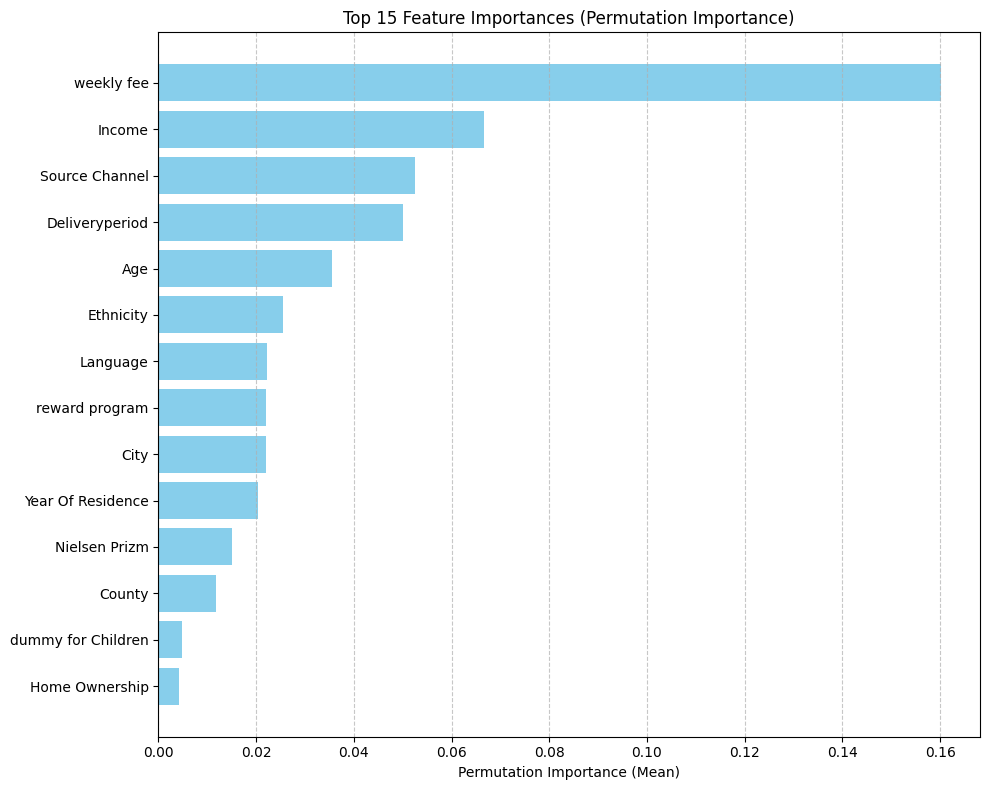

In [14]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 변수 중요도 분석 (permutation_importance)
print("\nPermutation Importance on Test Set:")
perm_importance = permutation_importance(grid_search.best_estimator_, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

perm_df = pd.DataFrame({'feature': X_test.columns, 'importance_mean': perm_importance.importances_mean})
perm_df = perm_df.sort_values(by='importance_mean', ascending=False)

top_n = 15
# 중요도 내림차순 정렬 후 상위 n개 선택
perm_df_top = perm_df.sort_values(by='importance_mean', ascending=False).head(top_n)
# 그래프는 보통 가독성 위해 오름차순으로 그리니 다시 정렬
perm_df_top = perm_df_top.sort_values(by='importance_mean', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(perm_df_top['feature'], perm_df_top['importance_mean'], color='skyblue')
plt.xlabel('Permutation Importance (Mean)')
plt.title(f'Top {top_n} Feature Importances (Permutation Importance)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
# 음수 중요도 변수만 필터링
perm_df_neg = perm_df[perm_df['importance_mean'] < 0]

if not perm_df_neg.empty:
    # 음수 중요도 변수 내림차순(절댓값 기준) 정렬 (그래프용으로는 오름차순)
    perm_df_neg_sorted = perm_df_neg.sort_values(by='importance_mean', ascending=True).head(top_n)

    print("Features with Negative Permutation Importance:")
    print(perm_df_neg_sorted)

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.barh(perm_df_neg_sorted['feature'], perm_df_neg_sorted['importance_mean'], color='salmon')
    plt.xlabel('Permutation Importance (Mean)')
    plt.title('Features with Negative Permutation Importance')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No features with negative permutation importance.")

No features with negative permutation importance.
